# Find The Worst & Best Months To Invest Using Python

## Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [27]:
url = 'https://raw.githubusercontent.com/johnashu/datacamp/master/sp500.csv'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date'].values
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
2015-01-02,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2058.199951
2015-01-05,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2020.579956
2015-01-06,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2002.609985
2015-01-07,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2025.900024
2015-01-08,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2062.139893


In [28]:
df.shape

(252, 7)

In [29]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
2015-12-24,2015-12-24,2063.520020,2067.360107,2058.729980,2060.989990,1411860000,2060.989990
2015-12-28,2015-12-28,2057.770020,2057.770020,2044.199951,2056.500000,2492510000,2056.500000
2015-12-29,2015-12-29,2060.540039,2081.560059,2060.540039,2078.360107,2542000000,2078.360107
2015-12-30,2015-12-30,2077.340088,2077.340088,2061.969971,2063.360107,2367430000,2063.360107
2015-12-31,2015-12-31,2060.590088,2062.540039,2043.619995,2043.939941,2655330000,2043.939941


### Create the list to store the returns of each months

In [30]:
Jan =[]
Feb =[]
Mar=[]
Apr =[]
May =[]
Jun =[]
Jul =[]
Aug =[]
Sept =[]
Oct =[]
Nov =[]
Dic =[]

### Create a function  to get the return of each month

In [31]:
def get_return(month, returns):
    if month =='01':
        Jan.append(float(returns))
        
    elif month =='02':
        Feb.append(float(returns))
        
    elif month =='03':
        Mar.append(float(returns))
        
    elif month =='04':
        Apr.append(float(returns))
        
    elif month =='05':
        May.append(float(returns))
        
    elif month =='06':
        Jun.append(float(returns))
        
    elif month =='07':
        Jul.append(float(returns))
        
    elif month =='08':
        Aug.append(float(returns))
        
    elif month =='09':
        Sept.append(float(returns))
        
    elif month =='10':
        Oct.append(float(returns))
        
    elif month =='11':
        Nov.append(float(returns))
               
    elif month =='12':
        Dic.append(float(returns))
    else:
        print('something wrong')    

### Calculate DSR

In [32]:
DSR = df['Close'].pct_change(1)
df['DSR'] = DSR
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,DSR
2015-01-02,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2058.199951,NaN
2015-01-05,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2020.579956,-0.018278
2015-01-06,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2002.609985,-0.008893
2015-01-07,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2025.900024,0.011630
2015-01-08,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2062.139893,0.017888


In [33]:
df = df[1:]
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,DSR
2015-01-05,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2020.579956,-0.018278
2015-01-06,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2002.609985,-0.008893
2015-01-07,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2025.900024,0.011630
2015-01-08,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2062.139893,0.017888
2015-01-09,2015-01-09,2063.449951,2064.429932,2038.329956,2044.810059,3364140000,2044.810059,-0.008404


### Create a loop for gather the DSR

In [36]:
for i in range(0, len(df)):
    df_date = str(df.index[i])
    df_returns = df['DSR'][i]
    df_month = df_date.split('-')[1]
    get_return(df_month, df_returns)

### Create function to calculate de AVG

In [44]:
def get_avg(month):
    return [sum(month)/len(month)]

In [51]:
# create a DF_AVG
df_AVG = pd.DataFrame()
df_AVG['AVG'] = get_avg(Jan) + get_avg(Feb) + get_avg(Mar) + get_avg(Apr) + get_avg(May) + get_avg(Jun)+ get_avg(Jul) + get_avg(Aug) + get_avg(Sept)+ get_avg(Oct) + get_avg(Nov) + get_avg(Dic)

In [53]:
df_AVG.set_index(df_AVG.index +1, inplace=True)

In [54]:
df_AVG *100 

,AVG
1,-0.227932
2,0.283383
3,-0.075854
4,0.041773
5,0.054397
6,-0.094122
7,0.091498
8,-0.293757
9,-0.117922
10,0.366010


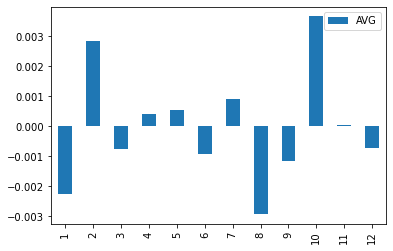

In [62]:
df_AVG.plot.bar();